# Librairies

In [1]:
#utilities
import os
import sys
from pathlib import Path
import json

#data science librairies
import numpy as np
import pandas as pd

# vizualisation libraires
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../data/raw/"
bnb_file = data_path+"data_BNB.csv"
btc_file = data_path+"data_BTC.csv"

tweet_btc = data_path+"bitcoin.json"
tweet_eth = data_path+"ethereum.json"
tweet_bnb = data_path+"binance.json"
df = pd.read_csv(btc_file)
df

,Date,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrade,TakerbuybaseV,TakerbuyquoteV,Ignore
0,1.502928e+09,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395
1,1.503014e+09,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409
2,1.503101e+09,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529
3,1.503187e+09,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084
4,1.503274e+09,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970
...,...,...,...,...,...,...,...,...,...,...,...,...
1322,1.617149e+09,58746.57,59800.00,56769.00,58740.55,60975.542666,1617235199999,3.575976e+09,1928224,31074.813187,1.823823e+09,0.000000
1323,1.617235e+09,58739.46,59490.00,57935.45,58720.44,47415.617220,1617321599999,2.789239e+09,1594431,22966.256736,1.351152e+09,0.000000
1324,1.617322e+09,58720.45,60200.00,58428.57,58950.01,47382.418781,1617407999999,2.811160e+09,1666356,23695.695154,1.406394e+09,0.000000
1325,1.617408e+09,58950.01,59791.72,56880.00,57051.94,47409.852113,1617494399999,2.783152e+09,1606805,23057.967017,1.353960e+09,0.000000


## Manage dataset tweet

In [3]:
def processDataTweet(db,name=None):
    tweets = []
    date = []
    usernames =[]
    list_tweet = []
    for line in open(db, 'r'):
        tweets.append(json.loads(line))

    for tweet in tweets:
        date.append(tweet['created_at'])
        usernames.append(tweet['username'])
        list_tweet.append(tweet['tweet'])

    data = {
        'date':date,
        'username':usernames,
        'tweet':list_tweet
    }

    df = pd.DataFrame(data)
    df.to_csv(f'../data/processed/{name}_clean.csv',index=False)
    
processDataTweet(tweet_btc,'bitcoin')
processDataTweet(tweet_eth,'ethereum')
processDataTweet(tweet_bnb,'binance')

,date,username,tweet
0,2021-03-31 23:51:30 CEST,bashirahmaad,All investments carry risk. Never invest more ...
1,2021-03-31 22:30:03 CEST,binance,Check out the top #Binance Futures traders of ...
2,2021-03-31 21:00:01 CEST,binance,New languages now supported on https://t.co/Q...
3,2021-03-31 19:36:16 CEST,cz_binance,I am truly honored to be working with not only...
4,2021-03-31 18:22:37 CEST,binance,.@cz_binance x @TeletubbiesHQ? https://t.co/n...
...,...,...,...
5023,2017-08-23 13:52:23 CEST,binance,TRX(TRON) ICO - BNB Session on Binance exchang...
5024,2017-08-22 06:15:37 CEST,binance,The warm-up session of TRON sold out in 53 sec...
5025,2017-08-21 09:13:17 CEST,binance,【Binance Will Launch ICO Warm-up Session of TR...
5026,2017-08-18 19:57:48 CEST,binance,"Binance Will Add OAX, DNT, MCO, ICN https://t..."


In [8]:
df = pd.read_csv('../data/processed/binance_clean.csv')
df['date'] = pd.to_datetime(df['date'])
df

,date,username,tweet
0,2021-03-31 23:51:30+02:00,bashirahmaad,All investments carry risk. Never invest more ...
1,2021-03-31 22:30:03+02:00,binance,Check out the top #Binance Futures traders of ...
2,2021-03-31 21:00:01+02:00,binance,New languages now supported on https://t.co/Q...
3,2021-03-31 19:36:16+02:00,cz_binance,I am truly honored to be working with not only...
4,2021-03-31 18:22:37+02:00,binance,.@cz_binance x @TeletubbiesHQ? https://t.co/n...
...,...,...,...
5023,2017-08-23 13:52:23+02:00,binance,TRX(TRON) ICO - BNB Session on Binance exchang...
5024,2017-08-22 06:15:37+02:00,binance,The warm-up session of TRON sold out in 53 sec...
5025,2017-08-21 09:13:17+02:00,binance,【Binance Will Launch ICO Warm-up Session of TR...
5026,2017-08-18 19:57:48+02:00,binance,"Binance Will Add OAX, DNT, MCO, ICN https://t..."


In [9]:
bnb_df = df.copy()
bnb_df

,date,username,tweet
0,2021-03-31 23:51:30+02:00,bashirahmaad,All investments carry risk. Never invest more ...
1,2021-03-31 22:30:03+02:00,binance,Check out the top #Binance Futures traders of ...
2,2021-03-31 21:00:01+02:00,binance,New languages now supported on https://t.co/Q...
3,2021-03-31 19:36:16+02:00,cz_binance,I am truly honored to be working with not only...
4,2021-03-31 18:22:37+02:00,binance,.@cz_binance x @TeletubbiesHQ? https://t.co/n...
...,...,...,...
5023,2017-08-23 13:52:23+02:00,binance,TRX(TRON) ICO - BNB Session on Binance exchang...
5024,2017-08-22 06:15:37+02:00,binance,The warm-up session of TRON sold out in 53 sec...
5025,2017-08-21 09:13:17+02:00,binance,【Binance Will Launch ICO Warm-up Session of TR...
5026,2017-08-18 19:57:48+02:00,binance,"Binance Will Add OAX, DNT, MCO, ICN https://t..."


<AxesSubplot:>

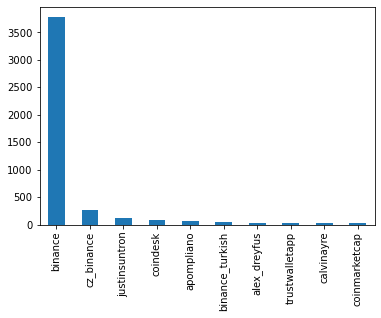

In [18]:
bnb_df.username.value_counts(sort=True).head(10).plot(kind='bar')

In [19]:
df = pd.read_csv('../data/processed/bitcoin_clean.csv')
df['date'] = pd.to_datetime(df['date'])
df

,date,username,tweet
0,2021-04-01 01:27:17+02:00,michael_saylor,#Gold doesn't work anymore. #Bitcoin broke i...
1,2021-04-01 01:00:12+02:00,technology,One Bitcoin transaction equals 75 gallons of g...
2,2021-04-01 01:00:07+02:00,bloombergtv,One Bitcoin transaction equals 75 gallons of g...
3,2021-04-01 00:49:28+02:00,cynthiamlummis,I spy with my laser eyes... #Bitcoin
4,2021-03-31 23:23:07+02:00,charliebilello,1. Stocks: all-time high 2. Home prices: all-t...
...,...,...,...
30004,2013-12-16 15:00:02+01:00,heineken,"Our vision of the future? Drink real beer, pay..."
30005,2013-12-16 00:41:08+01:00,cdixon,Bitcoin and the Byzantine Generals Problem ht...
30006,2013-12-15 20:23:15+01:00,benedictevans,It really ought to be possible to build a paym...
30007,2013-12-08 04:18:05+01:00,karaswisher,My Bitcoin Bummer — World’s Virtual Currency P...


In [20]:
btc_df = df.copy()
btc_df

,date,username,tweet
0,2021-04-01 01:27:17+02:00,michael_saylor,#Gold doesn't work anymore. #Bitcoin broke i...
1,2021-04-01 01:00:12+02:00,technology,One Bitcoin transaction equals 75 gallons of g...
2,2021-04-01 01:00:07+02:00,bloombergtv,One Bitcoin transaction equals 75 gallons of g...
3,2021-04-01 00:49:28+02:00,cynthiamlummis,I spy with my laser eyes... #Bitcoin
4,2021-03-31 23:23:07+02:00,charliebilello,1. Stocks: all-time high 2. Home prices: all-t...
...,...,...,...
30004,2013-12-16 15:00:02+01:00,heineken,"Our vision of the future? Drink real beer, pay..."
30005,2013-12-16 00:41:08+01:00,cdixon,Bitcoin and the Byzantine Generals Problem ht...
30006,2013-12-15 20:23:15+01:00,benedictevans,It really ought to be possible to build a paym...
30007,2013-12-08 04:18:05+01:00,karaswisher,My Bitcoin Bummer — World’s Virtual Currency P...


<AxesSubplot:>

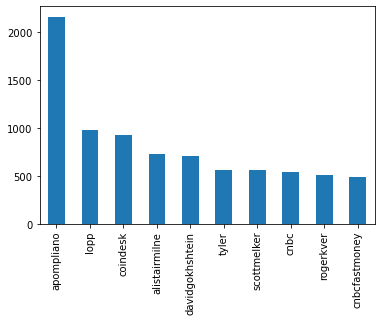

In [21]:
btc_df.username.value_counts(sort=True).head(10).plot(kind='bar')

<AxesSubplot:>

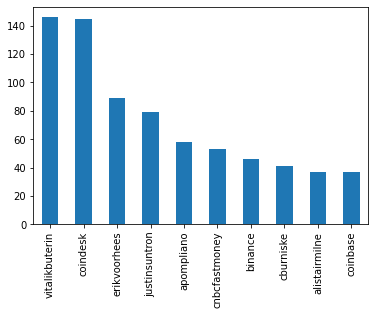

In [22]:
df = pd.read_csv('../data/processed/ethereum_clean.csv')
df['date'] = pd.to_datetime(df['date'])
eth_df = df.copy()
eth_df.username.value_counts(sort=True).head(10).plot(kind='bar')

<AxesSubplot:xlabel='date'>

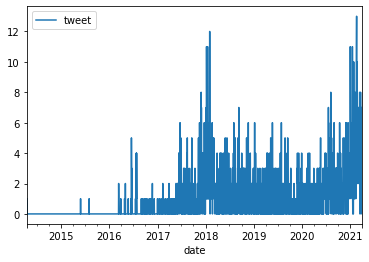

In [32]:
test = eth_df[['date','tweet']].groupby(['date']).count()
test.resample("1D").sum().plot()